In [1]:
%load_ext rpy2.ipython

from cap2.capalyzer.pangea import PangeaFileSource
from cap2.capalyzer.pangea.utils import get_pangea_group
from cap2.capalyzer.table_builder import CAPTableBuilder

from numpy.random import choice
from plotnine import *
import pandas as pd
import warnings
from glob import glob
from os.path import isfile

warnings.filterwarnings('ignore')

twins_group = get_pangea_group('Mason Lab', 'NASA Twins', 'dcdanko@gmail.com', )
twins_source = PangeaFileSource(twins_group)
twins = CAPTableBuilder('twins', twins_source)
zymo_group = get_pangea_group('Mason Lab', 'Zymo Lysis Study', 'dcdanko@gmail.com', )
zymo_source = PangeaFileSource(zymo_group)
zymo = CAPTableBuilder('zymo', zymo_source)

In [2]:
twins_meta = twins.metadata()
twins_meta['date'] = pd.to_datetime(twins_meta['date'])
twins_taxa = twins.taxa_read_counts()

twins_meta

,date,kind,flight,subject,during_flight
011515_TW_B,2015-01-15,buccal,before,TW,before
011515_TW_S,2015-01-15,saliva,before,TW,before
012015_HR_B,2015-01-20,buccal,ground,HR,before
012015_HR_S,2015-01-20,saliva,ground,HR,before
012016_HR_B,2016-01-20,buccal,ground,HR,flight
012016_HR_S,2016-01-20,saliva,ground,HR,flight
012715_TW_B,2015-01-27,buccal,before,TW,before
012715_TW_S,2015-01-27,saliva,before,TW,before
030116_TW_B,2016-03-01,buccal,flight,TW,flight
030116_TW_S,2016-03-01,saliva,flight,TW,flight


In [3]:
zymo_taxa = zymo.taxa_read_counts()
zymo_taxa

,d__Bacteria,d__Bacteria|p__Firmicutes,d__Bacteria|p__Firmicutes|c__Bacilli,d__Bacteria|p__Firmicutes|c__Bacilli|o__Bacillales,d__Bacteria|p__Firmicutes|c__Bacilli|o__Bacillales|f__Bacillaceae,d__Bacteria|p__Firmicutes|c__Bacilli|o__Bacillales|f__Bacillaceae|g__Bacillus,d__Bacteria|p__Firmicutes|c__Bacilli|o__Bacillales|f__Bacillaceae|g__Bacillus|s__Bacillus subtilis,d__Bacteria|p__Firmicutes|c__Bacilli|o__Bacillales|f__Bacillaceae|g__Bacillus|s__Bacillus vallismortis,d__Bacteria|p__Firmicutes|c__Bacilli|o__Bacillales|f__Bacillaceae|g__Bacillus|s__Bacillus halotolerans,d__Bacteria|p__Firmicutes|c__Bacilli|o__Bacillales|f__Bacillaceae|g__Bacillus|s__Bacillus mojavensis,...,d__Viruses|p__Uroviricota|c__Caudoviricetes|o__Caudovirales|f__Siphoviridae|g__Samwavirus|s__Corynebacterium virus SamW,d__Viruses|p__Uroviricota|c__Caudoviricetes|o__Caudovirales|f__Autographiviridae|g__Drulisvirus|s__Klebsiella virus KpV48,d__Viruses|p__Uroviricota|c__Caudoviricetes|o__Caudovirales|f__Siphoviridae|s__Streptococcus phage IC1,d__Viruses|k__Loebvirae|p__Hofneiviricota|c__Faserviricetes|o__Tubulavirales|f__Inoviridae|s__Ralstonia phage 1 NP-2014,d__Viruses|p__Uroviricota|c__Caudoviricetes|o__Caudovirales|f__Siphoviridae|g__Neferthenavirus,d__Viruses|p__Uroviricota|c__Caudoviricetes|o__Caudovirales|f__Siphoviridae|g__Neferthenavirus|s__Microbacterium virus Neferthena,d__Viruses|k__Orthornavirae|p__Negarnaviricota|c__Ellioviricetes|o__Bunyavirales|f__Phenuiviridae|g__Phlebovirus|s__Bujaru phlebovirus,d__Viruses|p__Uroviricota|c__Caudoviricetes|o__Caudovirales|f__Siphoviridae|s__Microbacterium phage vB_MoxS-ISF9,d__Viruses|s__Hubei permutotetra-like virus 6,d__Viruses|p__Uroviricota|c__Caudoviricetes|o__Caudovirales|f__Myoviridae|s__Pectobacterium phage ZF40
in1112_100,2824095.0,1472978.0,1471509.0,892471.0,328297.0,327869.0,13347.0,2698.0,736.0,569.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
in1112_101,2323843.0,1182953.0,1178287.0,714762.0,265064.0,264691.0,10715.0,2081.0,608.0,459.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
in1112_102,2413744.0,1231025.0,1227582.0,745873.0,277608.0,277254.0,11176.0,2149.0,618.0,446.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
in1112_103,5135084.0,2440403.0,2438707.0,1446444.0,552943.0,552226.0,22293.0,4486.0,1187.0,939.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
in1112_104,2750132.0,1408892.0,1408472.0,850555.0,315913.0,315510.0,12597.0,2414.0,682.0,561.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
in1112_96,2290573.0,1216268.0,1214923.0,702605.0,272363.0,272007.0,10921.0,2164.0,626.0,501.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
in1112_97,1984605.0,529593.0,524439.0,244542.0,91437.0,91273.0,3814.0,727.0,221.0,155.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
in1112_98,5236263.0,1418961.0,1417226.0,651155.0,250851.0,250398.0,9903.0,2050.0,566.0,423.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
in1112_99,1932015.0,520697.0,520158.0,245323.0,90887.0,90722.0,3704.0,776.0,200.0,156.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
zymo_taxa.sum(axis=1).mean() / (1000 * 1000)

32.7096832368

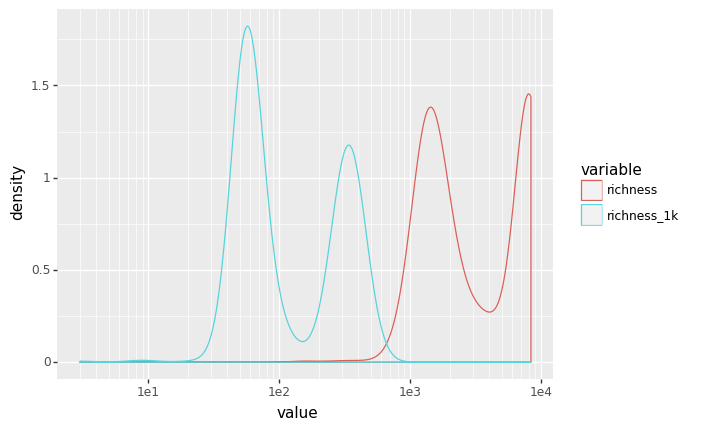

<ggplot: (8740374976376)>

In [5]:
t = pd.DataFrame.from_dict({
    'richness': (zymo_taxa > 0).sum(axis=1),
    'richness_1k': (zymo_taxa > 1000).sum(axis=1),
})
t = t.melt()

(
    ggplot(t, aes(x='value', color='variable')) +
        geom_density() +
        scale_x_log10()
)

In [6]:
fecalz_taxa = (zymo_taxa > 1000).sum(axis=1) >= 200
fecalz_taxa = fecalz_taxa[fecalz_taxa].index
fecalz_taxa = zymo_taxa.loc[fecalz_taxa]
fecalz_taxa = fecalz_taxa.dropna(axis=1, how='all')
fecalz_taxa = fecalz_taxa.fillna(0)

fecalz_taxa

,d__Bacteria,d__Bacteria|p__Firmicutes,d__Bacteria|p__Firmicutes|c__Bacilli,d__Bacteria|p__Firmicutes|c__Bacilli|o__Bacillales,d__Bacteria|p__Firmicutes|c__Bacilli|o__Bacillales|f__Bacillaceae,d__Bacteria|p__Firmicutes|c__Bacilli|o__Bacillales|f__Bacillaceae|g__Bacillus,d__Bacteria|p__Firmicutes|c__Bacilli|o__Bacillales|f__Bacillaceae|g__Bacillus|s__Bacillus subtilis,d__Bacteria|p__Firmicutes|c__Bacilli|o__Bacillales|f__Bacillaceae|g__Bacillus|s__Bacillus vallismortis,d__Bacteria|p__Firmicutes|c__Bacilli|o__Bacillales|f__Bacillaceae|g__Bacillus|s__Bacillus halotolerans,d__Bacteria|p__Firmicutes|c__Bacilli|o__Bacillales|f__Bacillaceae|g__Bacillus|s__Bacillus mojavensis,...,d__Viruses|p__Uroviricota|c__Caudoviricetes|o__Caudovirales|f__Siphoviridae|g__Samwavirus,d__Viruses|p__Uroviricota|c__Caudoviricetes|o__Caudovirales|f__Siphoviridae|g__Samwavirus|s__Corynebacterium virus SamW,d__Viruses|p__Uroviricota|c__Caudoviricetes|o__Caudovirales|f__Autographiviridae|g__Drulisvirus|s__Klebsiella virus KpV48,d__Viruses|p__Uroviricota|c__Caudoviricetes|o__Caudovirales|f__Siphoviridae|s__Streptococcus phage IC1,d__Viruses|k__Loebvirae|p__Hofneiviricota|c__Faserviricetes|o__Tubulavirales|f__Inoviridae|s__Ralstonia phage 1 NP-2014,d__Viruses|p__Uroviricota|c__Caudoviricetes|o__Caudovirales|f__Siphoviridae|g__Neferthenavirus,d__Viruses|p__Uroviricota|c__Caudoviricetes|o__Caudovirales|f__Siphoviridae|g__Neferthenavirus|s__Microbacterium virus Neferthena,d__Viruses|k__Orthornavirae|p__Negarnaviricota|c__Ellioviricetes|o__Bunyavirales|f__Phenuiviridae|g__Phlebovirus|s__Bujaru phlebovirus,d__Viruses|p__Uroviricota|c__Caudoviricetes|o__Caudovirales|f__Siphoviridae|s__Microbacterium phage vB_MoxS-ISF9,d__Viruses|s__Hubei permutotetra-like virus 6
in1112_139,8476098.0,3409017.0,1256889.0,741702.0,292581.0,283317.0,11641.0,2200.0,650.0,535.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
in1112_153,6244487.0,1504955.0,62884.0,31741.0,15668.0,9861.0,118.0,27.0,33.0,16.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
in1112_154,4529009.0,604157.0,16247.0,10222.0,5268.0,3072.0,41.0,5.0,7.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
in1112_155,7505756.0,1017864.0,30759.0,21393.0,8774.0,5105.0,54.0,12.0,22.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
in1112_156,6777593.0,911955.0,23818.0,15298.0,7986.0,4631.0,57.0,20.0,16.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
in1112_878,4848405.0,1802475.0,74771.0,31734.0,13679.0,9571.0,116.0,15.0,37.0,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
in1112_879,6466198.0,2382290.0,96274.0,40388.0,17551.0,11865.0,129.0,24.0,36.0,11.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
in1112_880,5553266.0,2014176.0,82490.0,34074.0,14839.0,10118.0,122.0,18.0,51.0,9.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
in1112_890,7272838.0,2649725.0,115240.0,53789.0,18680.0,13001.0,185.0,35.0,39.0,17.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,0.0,0.0


In [7]:

twins_fecal = twins_meta.query('kind == "fecal"').index.to_list()
twins_fecal = twins_taxa.loc[twins_fecal]
twins_fecal = twins_fecal.loc[twins_fecal.sum(axis=1) > 0]

def subsample_row(row, n, drop=True):
    pvals = row.values
    pvals /= sum(pvals)
    vals = choice(row.index, p=pvals, size=(n,))
    tbl = {}
    if not drop:
        for val in row.index:
            tbl[val] = 0
    for val in vals:
        tbl[val] = 1 + tbl.get(val, 0)
    tbl = pd.Series(tbl)
    return tbl

# N = 1000 * 1000 * 10
# twins_fecal = twins_fecal.fillna(0).apply(lambda r: subsample_row(r, N), axis=1)
# fecalz_taxa = fecalz_taxa.fillna(0).apply(lambda r: subsample_row(r, N), axis=1)

print(fecalz_taxa.sum(axis=1).mean(), twins_fecal.sum(axis=1).mean())

46579470.181069955 57923424.23529412


In [84]:

def taxa_in_sample(taxa, sample):
    taxa = taxa.loc[sample]
    taxa = taxa[taxa >= 1]
    taxa = set(taxa.index)
    return taxa

def previously_unobserved_taxa(taxa, samples):
    try:
        taxa_set = taxa_in_sample(taxa, samples[0])
    except KeyError:
        return previously_unobserved_taxa(taxa, samples[1:])
    n_original = len(taxa_set)
    out = {}
    for sample in samples[1:]:
        try:
            new_taxa = taxa_in_sample(taxa, sample)
        except KeyError:
            continue
        n_new_taxa = len(new_taxa - taxa_set)
        frac_new_taxa = n_new_taxa / n_original
        if frac_new_taxa > 1:
            print(frac_new_taxa, samples)
        out[len(out)] = frac_new_taxa
        taxa_set |= new_taxa
    return out

mymeta = twins_meta.loc[twins_fecal.index]
tw_real_order = mymeta.query('subject == "TW"').query('kind == "fecal"')['date'].sort_values().index.to_list()
hr_real_order = mymeta.query('subject == "HR"').query('kind == "fecal"')['date'].sort_values().index.to_list()

real = pd.DataFrame({
    'TW': previously_unobserved_taxa(twins_fecal, tw_real_order),
    'HR': previously_unobserved_taxa(twins_fecal, hr_real_order),
}).T
real['kind'] = real.index
real = real.melt(id_vars=['kind'])
real = real.dropna()
real['order'] = pd.Categorical(real['variable'] + 1)
real

,kind,variable,value,order
0,TW,0,0.036199,1
1,HR,0,0.028690,1
2,TW,1,0.020236,2
3,HR,1,0.015196,2
4,TW,2,0.014329,3
5,HR,2,0.008753,3
6,TW,3,0.009804,4
7,HR,3,0.008266,4
8,TW,4,0.006410,5
9,HR,4,0.006929,5


In [85]:

    
def taxa_samples(taxa, sample_size, N=1000):
    rows = []
    for i in range(N):
        if i % 5000 == 0:
            print(i)
        samples = taxa.sample(sample_size).index.to_list()
        rows.append(previously_unobserved_taxa(taxa, samples))
    rows = pd.DataFrame(rows)
    return rows

N = 10 # 100 * 1000
sampled = taxa_samples(fecalz_taxa, real['variable'].max() + 2, N=N)
sampled['permutation'] = sampled.index
sampled = sampled.melt(id_vars=['permutation'])
sampled['order'] = pd.Categorical(sampled['variable'] + 1)
sampled['kind'] = 'Reference'

sampled

0


,permutation,variable,value,order,kind
0,0,0,0.054381,1,Reference
1,1,0,0.032038,1,Reference
2,2,0,0.030902,1,Reference
3,3,0,0.038820,1,Reference
4,4,0,0.033999,1,Reference
...,...,...,...,...,...
75,5,7,0.005058,8,Reference
76,6,7,0.003696,8,Reference
77,7,7,0.003096,8,Reference
78,8,7,0.004445,8,Reference


In [86]:
# sampled.to_csv('saved_permutations.csv')

In [87]:
sampled = pd.read_csv('saved_permutations.csv', index_col=0)
sampled['order'] = pd.Categorical(sampled['order'])

In [88]:
def perm_test(row, ref):
    var = row['variable']
    ref = ref.query('variable == @var')
    percentile = (ref['value'] < row['value']).mean()
    return percentile

real['independent_percentile'] = real.apply(lambda r: perm_test(r, sampled), axis=1)
real

,kind,variable,value,order,independent_percentile
0,TW,0,0.036199,1,0.62197
1,HR,0,0.028690,1,0.39545
2,TW,1,0.020236,2,0.77793
3,HR,1,0.015196,2,0.49504
4,TW,2,0.014329,3,0.84068
5,HR,2,0.008753,3,0.35855
6,TW,3,0.009804,4,0.77680
7,HR,3,0.008266,4,0.61598
8,TW,4,0.006410,5,0.58520
9,HR,4,0.006929,5,0.66593


In [89]:

def chained_perm_test(ref, sample):
    sample_vals = sample.set_index('variable')['value']
    ref_vals = ref.set_index('variable')['value']
    N = min(sample_vals.shape[0], ref_vals.shape[0])
    passed  = (sample_vals.iloc[:N] >= ref_vals.iloc[:N]).sum()
    return passed

HR = sampled.groupby('permutation').apply(lambda x: chained_perm_test(real.query('kind == "HR"'), x))
print(HR.max())
TW = sampled.groupby('permutation').apply(lambda x: chained_perm_test(real.query('kind == "TW"'), x))
print(TW.max())

KeyboardInterrupt: 

In [ ]:
print('HR', (HR == 7).mean(), (HR < 7).sum())
print('TW', (TW == 8).mean(), (TW < 8).sum())


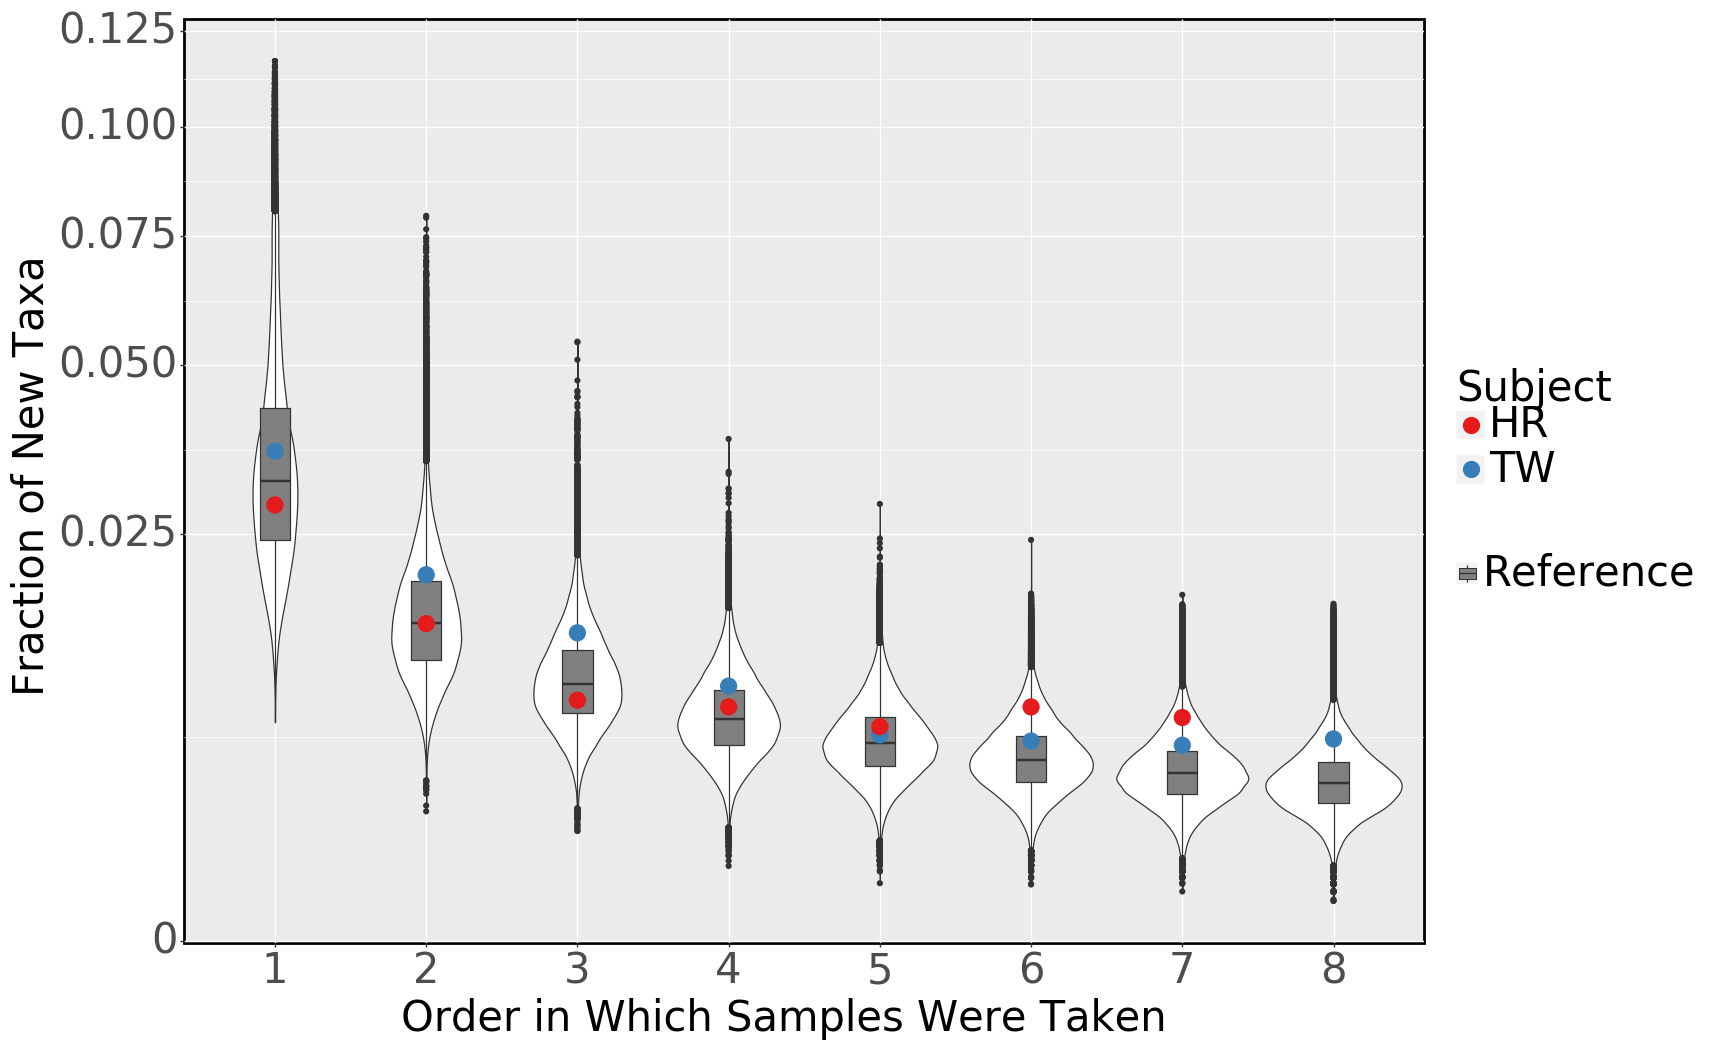

<ggplot: (8740358550946)>

In [95]:

(
    ggplot(sampled, aes(x='order', y='value')) +
        geom_violin() +
        geom_boxplot(aes(fill='kind'), width=0.2) +
        geom_point(aes(color='kind'), data=real, size=6) +
        # geom_line(aes(color='kind'), data=real, size=1) +
        scale_color_brewer(type='qualitative', palette=6, direction=1) +
        scale_fill_manual(values=['grey']) +
        scale_y_sqrt() +
        ylab('Fraction of New Taxa') +
        xlab('Order in Which Samples Were Taken') +
        labs(color='Subject', fill='') +
        theme(
            text=element_text(size=30),
            axis_text_x=element_text(angle=0),
            legend_position='right',
            panel_border=element_rect(colour="black", fill='none', size=2),
            figure_size=(16, 12),
        )

)

In [96]:

def total_previously_unobserved_taxa(taxa, samples):
    initial_taxa_set = set()
    for sample in samples[:1]:
        initial_taxa_set |= taxa_in_sample(taxa, sample)
    new_taxa = set()
    for sample in samples[0:]:
        new_taxa |= taxa_in_sample(taxa, sample) 
    frac = len(new_taxa - initial_taxa_set) / len(initial_taxa_set)
    return {'fraction': frac}

mymeta = twins_meta.loc[twins_fecal.index]
tw_real_order = mymeta.query('subject == "TW"').query('kind == "fecal"')['date'].sort_values().index.to_list()
hr_real_order = mymeta.query('subject == "HR"').query('kind == "fecal"')['date'].sort_values().index.to_list()

real = pd.DataFrame({
    'TW': total_previously_unobserved_taxa(twins_fecal, tw_real_order[:-1]),
    'HR': total_previously_unobserved_taxa(twins_fecal, hr_real_order),
}).T
real['kind'] = real.index
real = real.melt(id_vars=['kind'])
real = real.dropna()
real = real.set_index('kind')
real

,variable,value
kind,,
TW,fraction,0.098793
HR,fraction,0.083637


In [97]:
def total_taxa_samples(taxa, sample_size, N=1000):
    rows = []
    for i in range(N):
        if i % 5000 == 0:
            print(i)
        samples = taxa.sample(sample_size).index.to_list()
        rows.append(total_previously_unobserved_taxa(taxa, samples))
    rows = pd.DataFrame(rows)
    return rows

N = 1000
sampled = total_taxa_samples(fecalz_taxa, 8, N=N)
sampled['permutation'] = sampled.index
sampled = sampled.melt(id_vars=['permutation'])
sampled['kind'] = 'Reference'

sampled

0


,permutation,variable,value,kind
0,0,fraction,0.075305,Reference
1,1,fraction,0.136947,Reference
2,2,fraction,0.061321,Reference
3,3,fraction,0.068096,Reference
4,4,fraction,0.097288,Reference
...,...,...,...,...
995,995,fraction,0.071648,Reference
996,996,fraction,0.084055,Reference
997,997,fraction,0.084943,Reference
998,998,fraction,0.078241,Reference


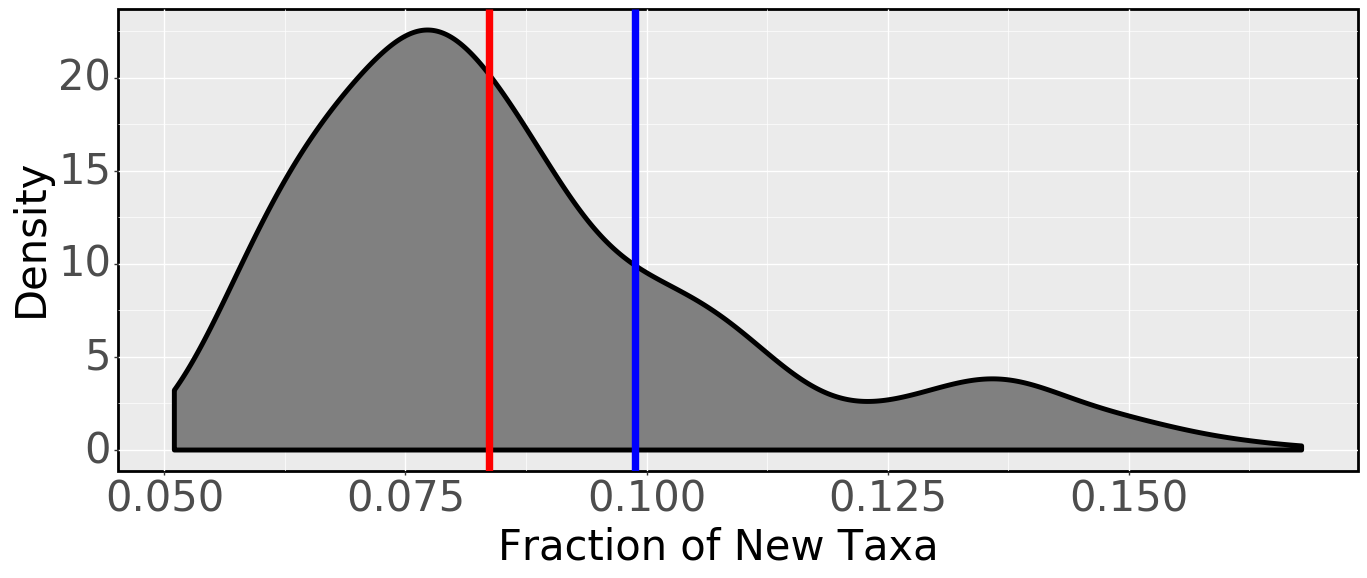

<ggplot: (8740386258440)>

In [98]:
(
    ggplot(sampled, aes(x='value')) +
        geom_density(size=2, fill='grey') +
        geom_vline(xintercept=real.loc['TW', 'value'], color='blue', size=3) +
        geom_vline(xintercept=real.loc['HR', 'value'], color='red', size=3) + 
        #scale_x_sqrt() +
        xlab('Fraction of New Taxa') +
        ylab('Density') +
        labs(color='Subject') +
        #coord_flip() +
        theme(
            text=element_text(size=30),
            axis_text_x=element_text(angle=0),
            legend_position='right',
            panel_border=element_rect(colour="black", fill='none', size=2),
            figure_size=(16, 6),
        )
)

In [99]:
print('TW', (sampled['value'] < real.loc['TW', 'value']).mean())
print('HR', (sampled['value'] < real.loc['HR', 'value']).mean())

TW 0.76
HR 0.552
